In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
data_df = pd.read_csv("Project_data_csv")

In [6]:
data_df.shape

(270223, 31)

In [7]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Over and Balls Total,Remaining Team Value,Remaining Average Team Value,Start Team Value,DLS %,Tie Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.6,103,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.8,103,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.9,104,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,55,16,2.0,24,39.1,104,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,55,16,2.0,24,39.3,105,4.79,29.31,Australia,Yes


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

In [9]:
remaining_onb = []
for index, row in data_df.iterrows():
    onb = (row['Remaining Overs']*6) + row['Remaining Balls']
    remaining_onb.append(onb)
remaining_onb_df = pd.DataFrame(remaining_onb)

In [10]:
remaining_onb_df

,0
0,179
1,178
2,177
3,176
4,175
...,...
270218,18
270219,17
270220,16
270221,15


Do I need to change the original data code to change batting team and bowling team to team 1 and team 2?  And should I remove 

In [11]:
winner_no = []
for index, row in data_df.iterrows():
    if row['Winner'] == row['batting_team']:
        winner_no.append(2)
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(1)
    else:
       winner_no.append(3)

In [12]:
winner_no_df = pd.DataFrame(winner_no)

In [13]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [14]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (1,2,3 respectively)

In [15]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [16]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [17]:
data_df['Remaining overs and balls'] = remaining_onb_df[0]

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [19]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remaining overs and balls', 'Remainder']]

In [20]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [21]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,2.000,24,4.79,29.31,1,179,29.5
1,1,3,16,2.000,24,4.79,29.31,1,178,29.4
2,2,3,16,2.000,24,4.79,29.31,1,177,29.3
3,3,3,16,2.000,24,4.79,29.31,1,176,29.2
4,4,3,16,2.000,24,4.79,29.31,1,175,29.1
...,...,...,...,...,...,...,...,...,...,...
270218,270218,3,13,1.625,21,5.40,31.64,2,18,3.0
270219,270219,3,13,1.625,21,5.40,31.64,2,17,2.5
270220,270220,3,13,1.625,21,5.40,31.64,2,16,2.4
270221,270221,3,13,1.625,21,5.40,31.64,2,15,2.3


In [22]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        270223 non-null  int64  
 1   Wickets taken                 270223 non-null  int64  
 2   Remaining Team Value          270223 non-null  int64  
 3   Remaining Average Team Value  270223 non-null  float64
 4   Start Team Value              270223 non-null  int64  
 5   Ground RPO                    270223 non-null  float64
 6   Ground RPW                    270223 non-null  float64
 7   Winner_num                    270223 non-null  int64  
 8   Remaining overs and balls     270223 non-null  int64  
 9   Remainder                     270223 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 20.6 MB


In [23]:
data_df.describe()

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
count,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,135111.000000,4.340881,12.531653,1.807368,24.059592,4.944435,30.351967,1.504702,104.967978,17.326729
std,78006.805233,2.190549,5.533073,0.332030,1.742394,0.353677,3.465019,0.525105,47.241142,7.871791
min,0.000000,0.000000,1.000000,1.000000,16.000000,3.980000,20.560000,1.000000,0.000000,0.000000
25%,67555.500000,3.000000,8.000000,1.600000,23.000000,4.720000,28.180000,1.000000,68.000000,11.200000
50%,135111.000000,4.000000,13.000000,1.857143,24.000000,4.850000,29.640000,1.000000,109.000000,18.100000
75%,202666.500000,6.000000,17.000000,2.000000,25.000000,5.090000,32.440000,2.000000,146.000000,24.200000
max,270222.000000,10.000000,29.000000,3.000000,30.000000,6.910000,53.080000,3.000000,180.000000,30.000000


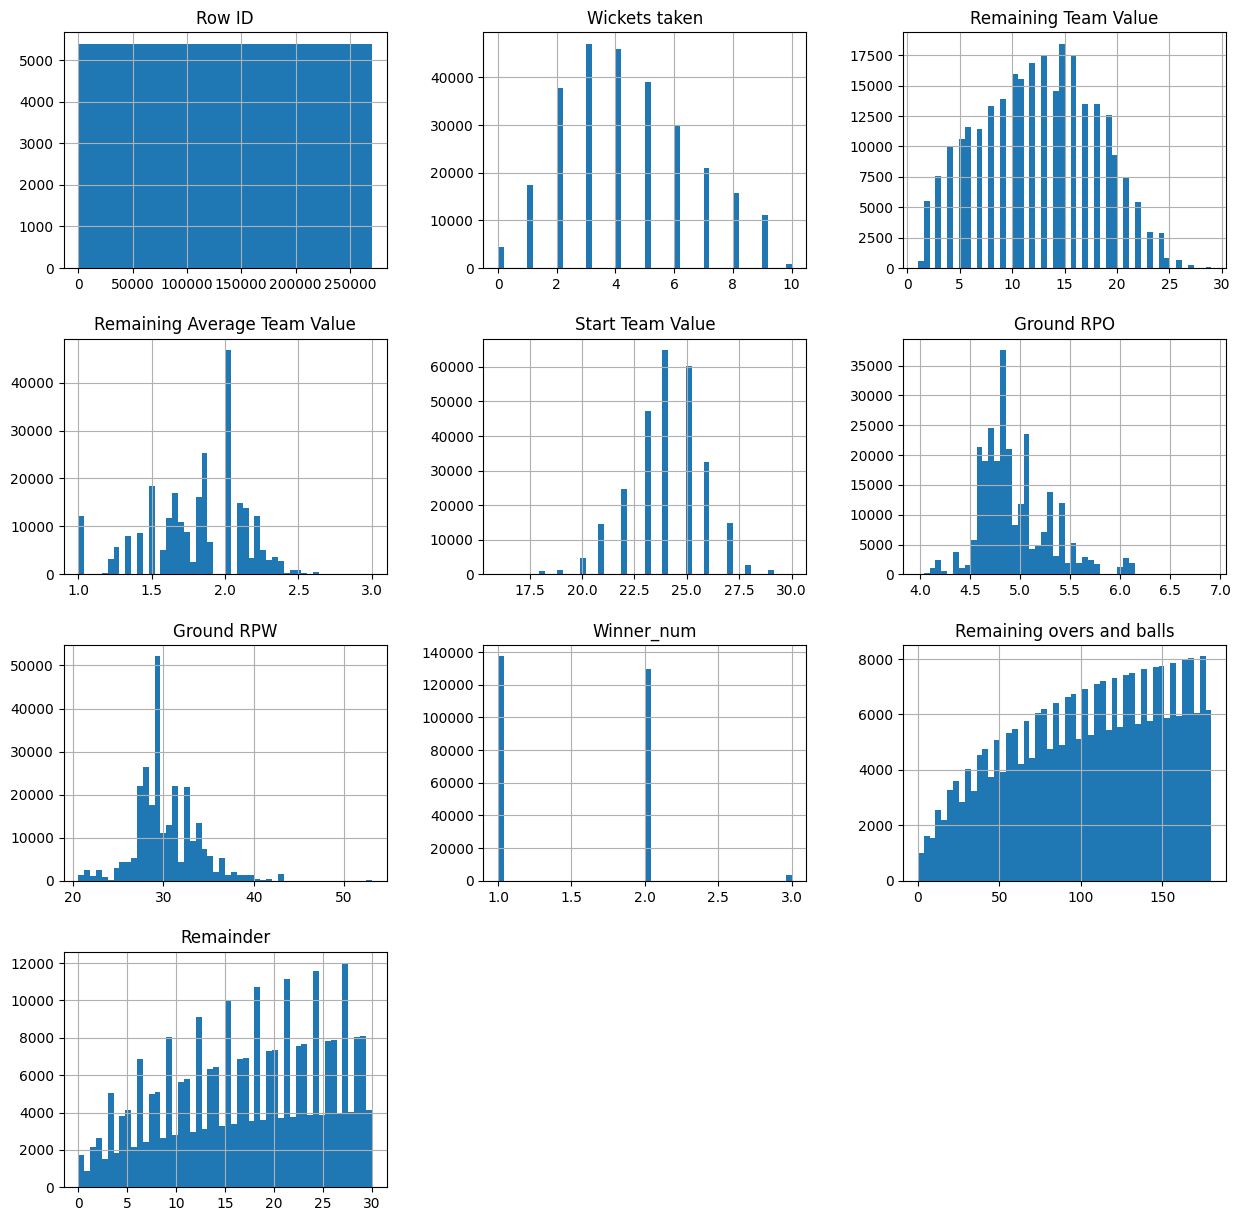

In [24]:
data_df.hist(bins=50, figsize=(15, 15))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder funny - should I do it in balls rather than remainder?  Might make more sense.

Wickets taken and team value seem to follow Gaussian distribution and have low standard deviation (2.19 and 2.53 respectively)
Turned remaining overs and balls into remainder number and std much lower for that(7.87 compared to 47.24)

The other attributes have low standard deviation too but ground rpo, ground rpw and 

In [25]:
data_df['Winner_num'].value_counts()

Winner_num
1    137321
2    129422
3      3480
Name: count, dtype: int64

In [26]:
data_df.shape

(270223, 10)

In [27]:
from zlib import crc32

def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
train_set, test_set = split_data_with_id_hash(data_df, 0.2, "Row ID")

In [29]:
train_set.shape

(216178, 10)

In [30]:
test_set.shape

(54045, 10)

In [31]:
data_test = test_set.copy()

In [32]:
data_test = data_test.reset_index(drop=True)

In [33]:
data_train = train_set.copy()

In [34]:

data_train = data_train.reset_index(drop=True)

In [35]:
data_train

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,2.000,24,4.79,29.31,1,179,29.5
1,1,3,16,2.000,24,4.79,29.31,1,178,29.4
2,3,3,16,2.000,24,4.79,29.31,1,176,29.2
3,4,3,16,2.000,24,4.79,29.31,1,175,29.1
4,6,3,16,2.000,24,4.79,29.31,1,173,28.5
...,...,...,...,...,...,...,...,...,...,...
216173,270216,3,13,1.625,21,5.40,31.64,2,20,3.2
216174,270218,3,13,1.625,21,5.40,31.64,2,18,3.0
216175,270219,3,13,1.625,21,5.40,31.64,2,17,2.5
216176,270220,3,13,1.625,21,5.40,31.64,2,16,2.4


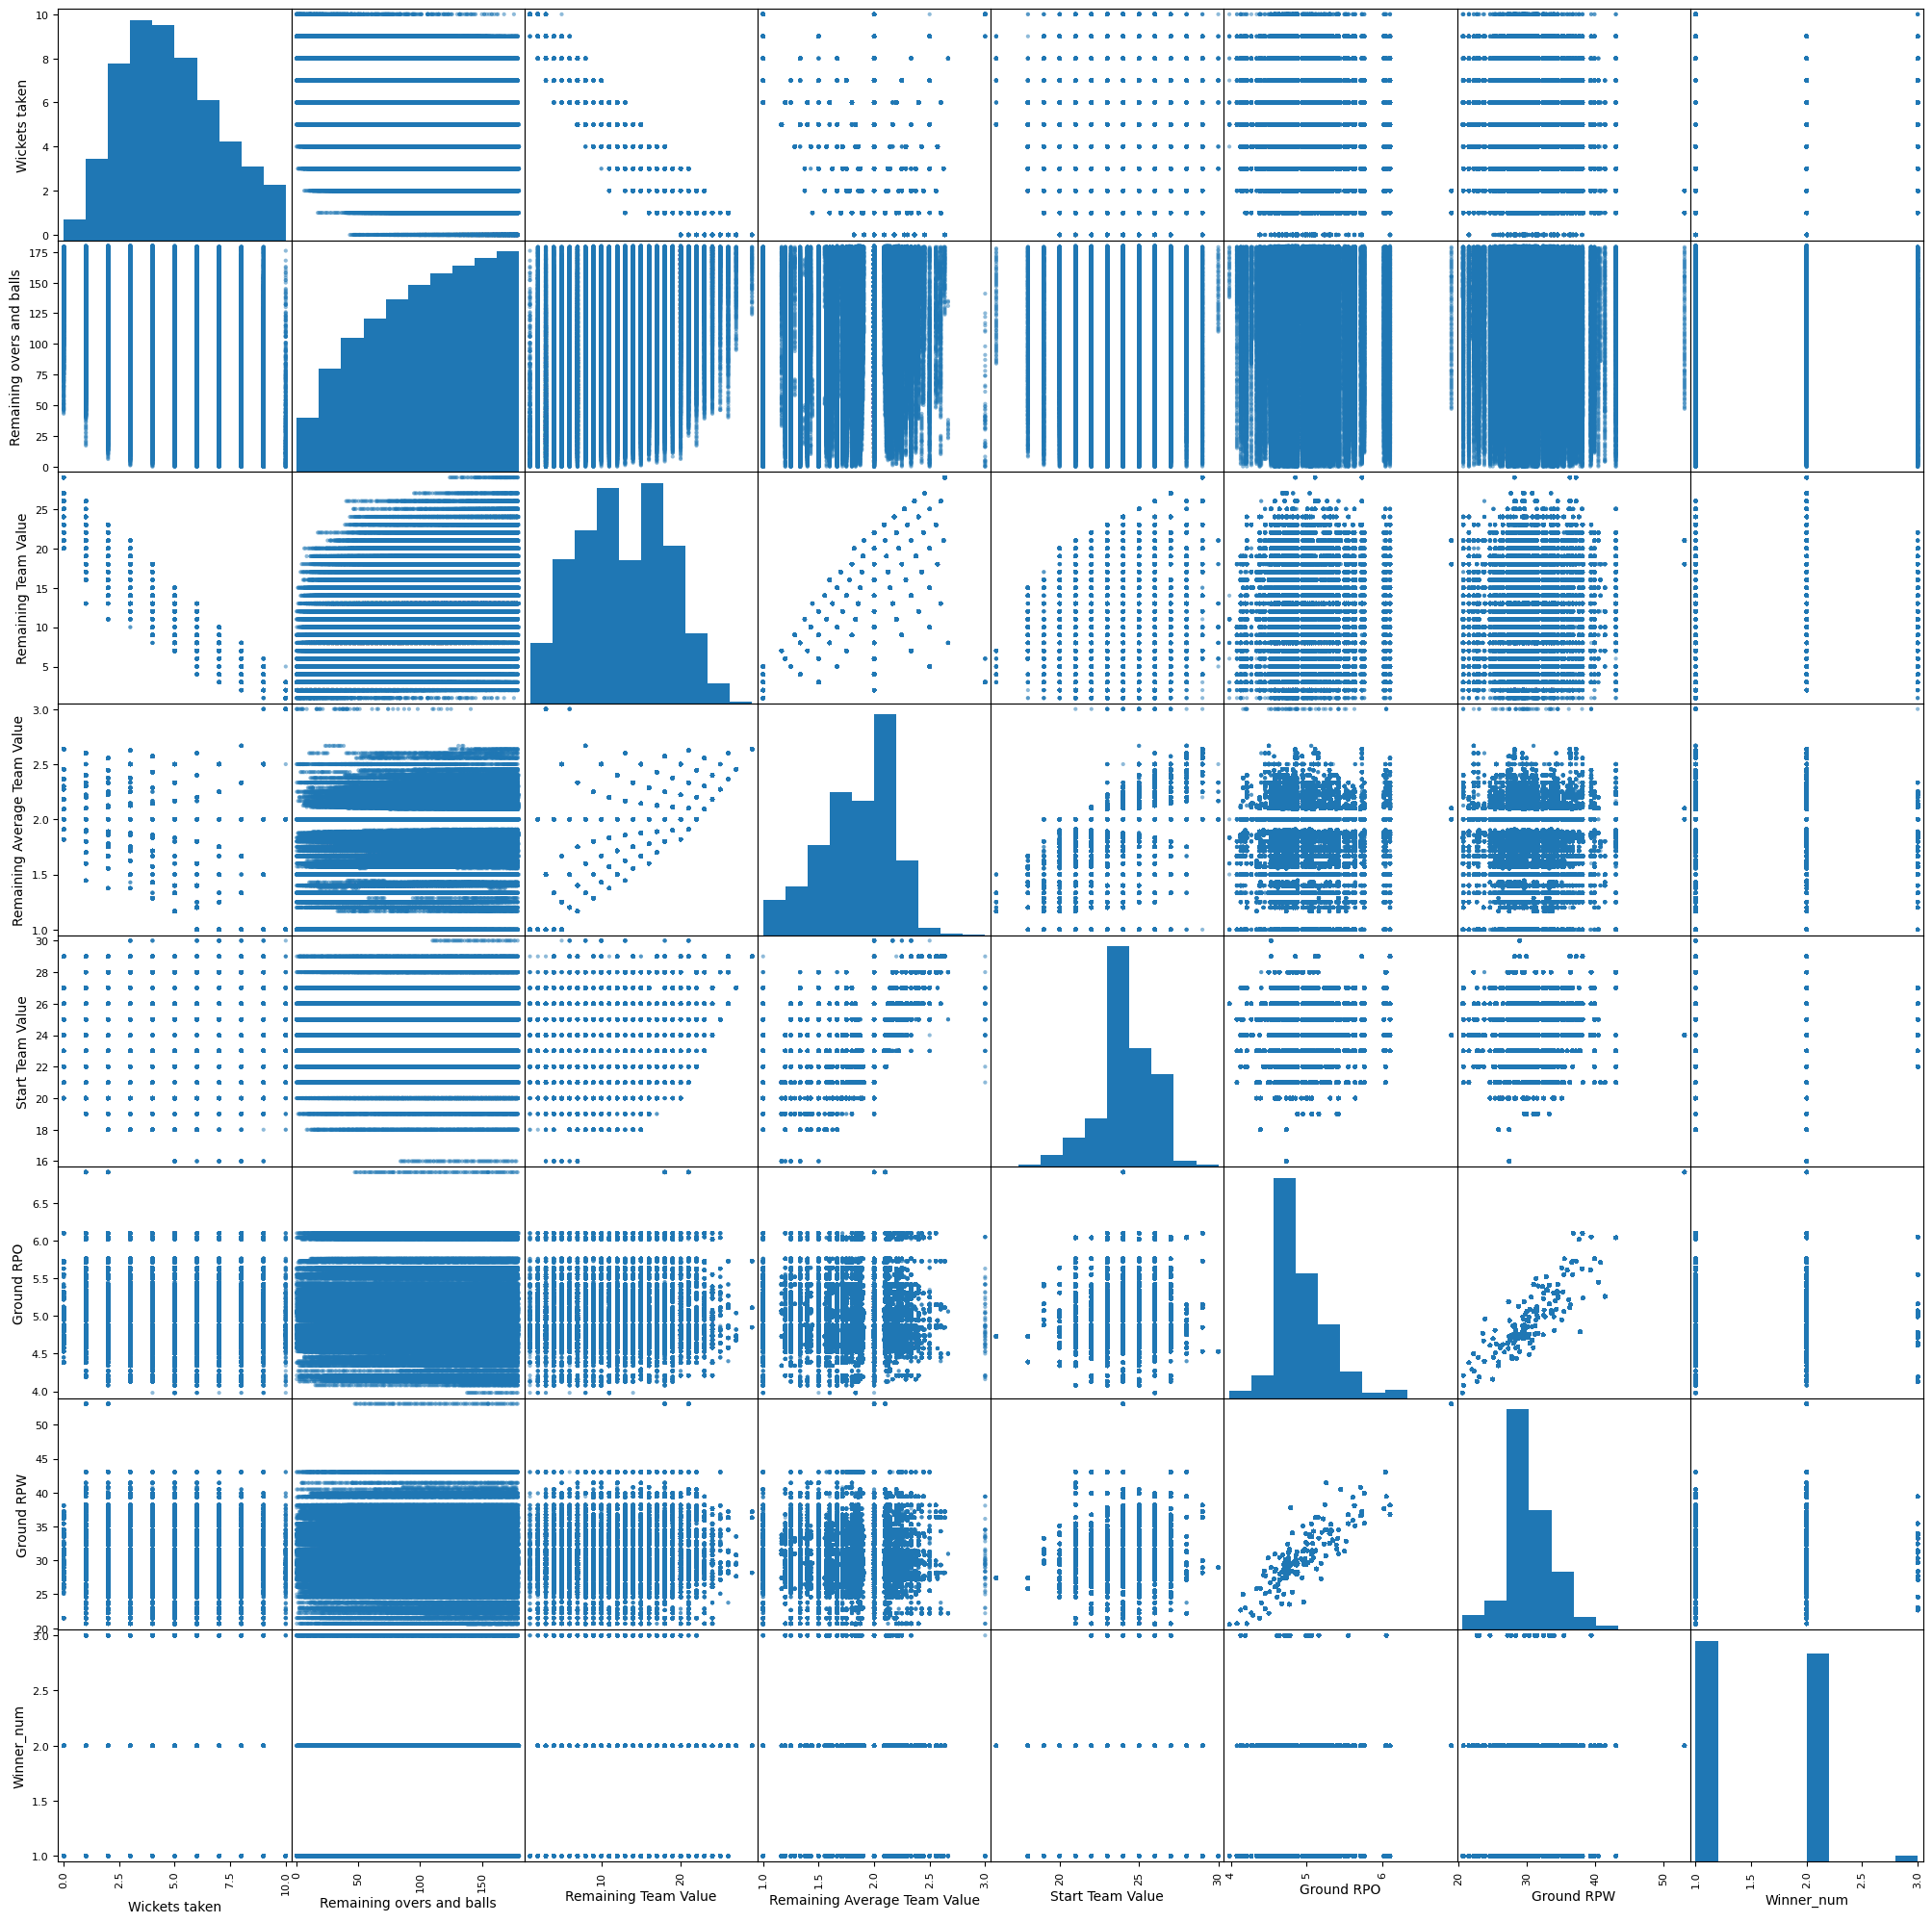

In [36]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remaining overs and balls", "Remaining Team Value", "Remaining Average Team Value", "Start Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(25, 25))
plt.show()

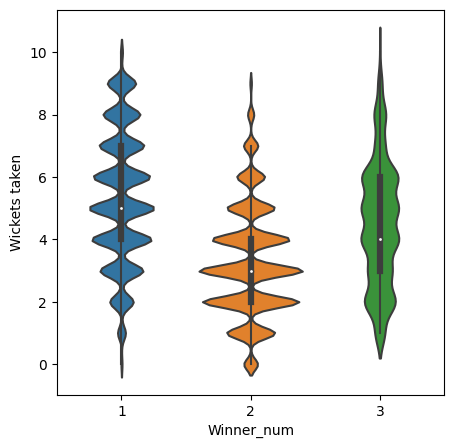

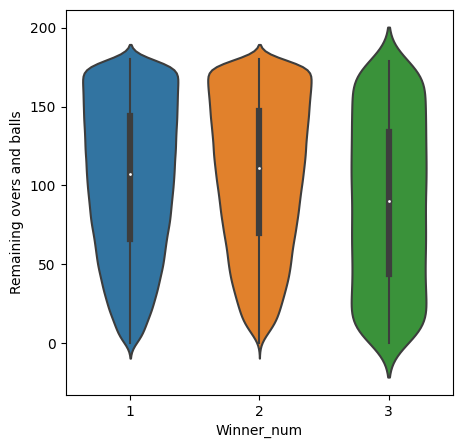

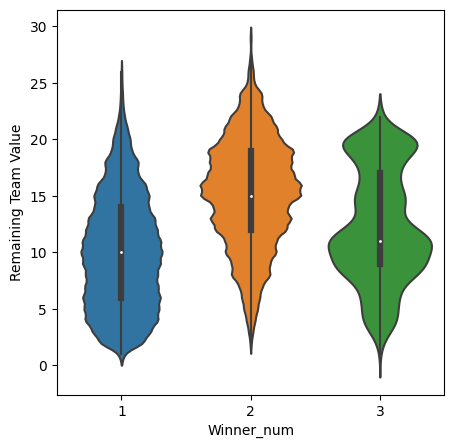

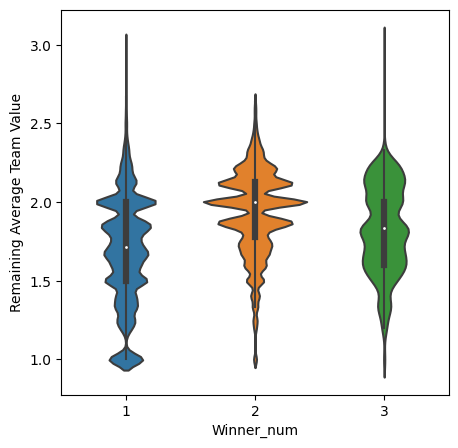

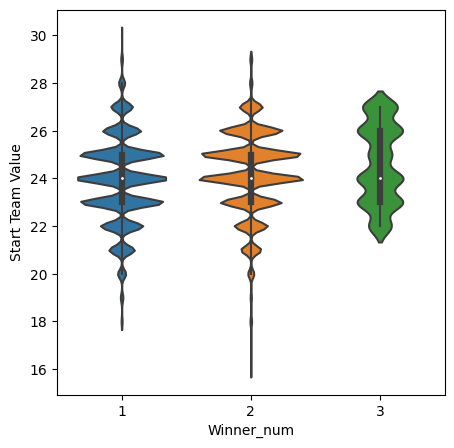

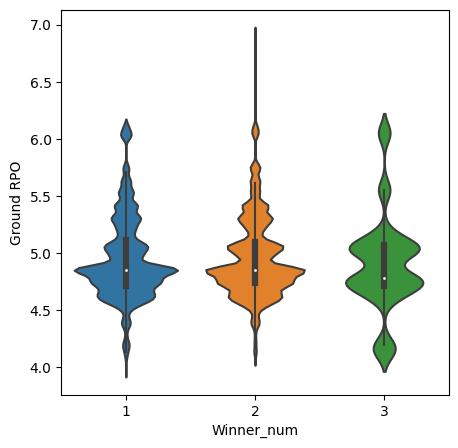

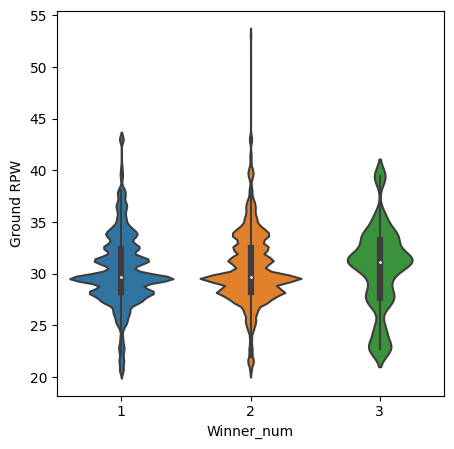

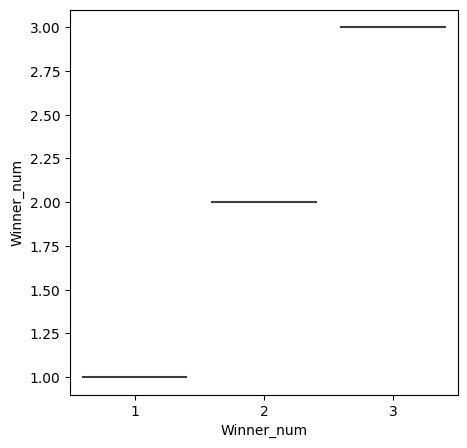

In [37]:
for a in attributes:
    plt.figure(figsize = (5, 5))
    sns.violinplot(x='Winner_num',y=a,data=data_train)

From the boxplots you can see some near separation between wickets taken and whether team 1 or team 2 win, but a mixture for tie.

For Team Value you also see some separation between team 1 and team 2, though more overlap than for the boxplots.  Again, tie for mixture.

Aside from some outliers, Ground RPO, Ground RPW and remaining overs and balls don't seem to predict whether team 1 or team 2 wins.

In [38]:
corr_matrix = data_train.corr(method = 'pearson')

In [39]:
corr_matrix
corr_matrix['Winner_num']

Row ID                          0.000953
Wickets taken                  -0.440997
Remaining Team Value            0.443631
Remaining Average Team Value    0.356336
Start Team Value                0.089055
Ground RPO                      0.005016
Ground RPW                      0.024205
Winner_num                      1.000000
Remaining overs and balls       0.017986
Remainder                       0.017977
Name: Winner_num, dtype: float64

<Axes: >

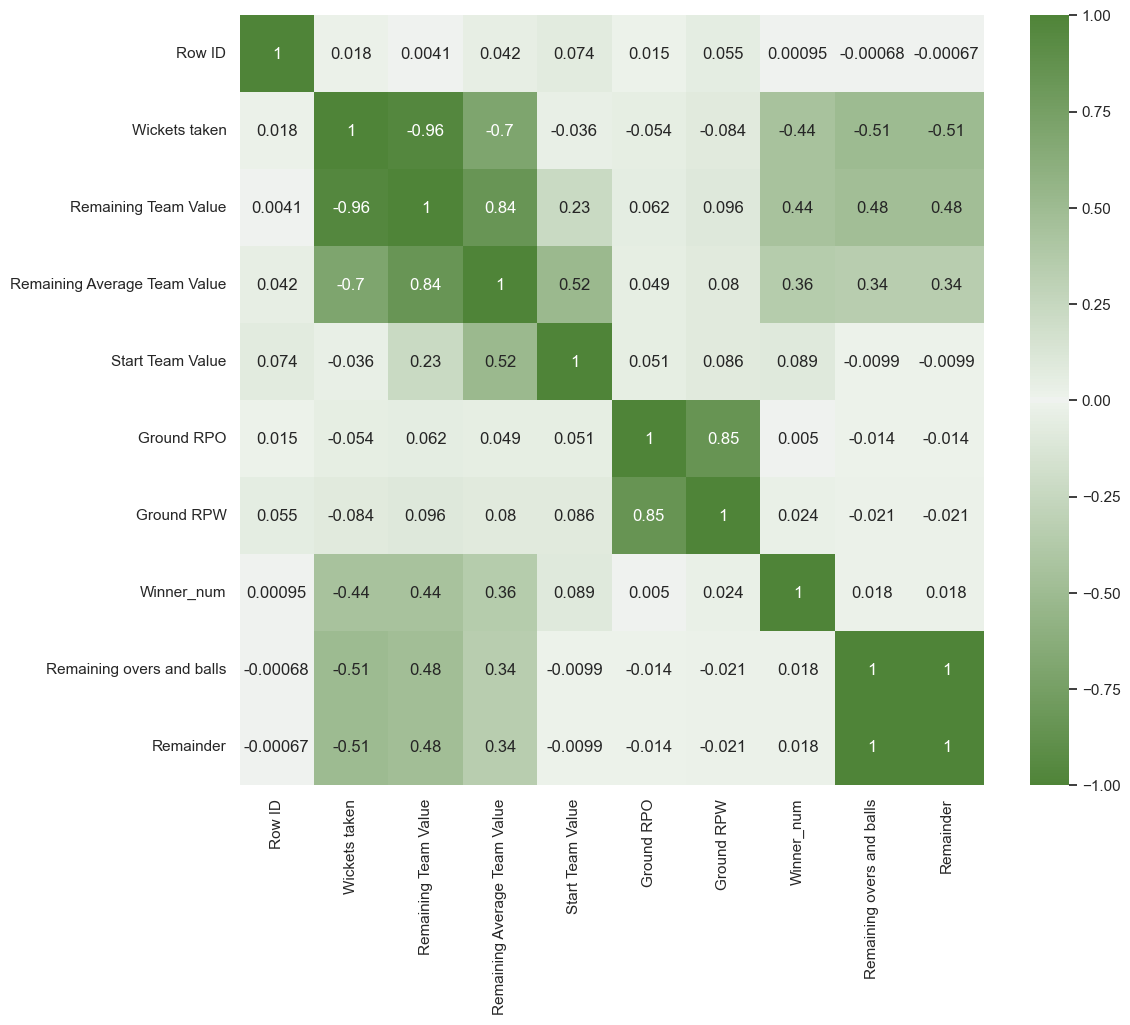

In [40]:
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [41]:
skew = data_train.skew(axis='rows')
print(skew)

Row ID                          0.000015
Wickets taken                   0.334836
Remaining Team Value            0.026673
Remaining Average Team Value   -0.522541
Start Team Value               -0.287459
Ground RPO                      0.958401
Ground RPW                      0.558402
Winner_num                      0.247734
Remaining overs and balls      -0.270833
Remainder                      -0.271601
dtype: float64


#Commentary on correlation

Best correlation with winner are wickets taken and team value.  Unsurprisingly there's strong correlation between ground RPO and RPW.  Strong correlation betwen team value and wickets taken, which also makes sense as the more wickets taken the lower the team value.  Should I really be looking at the higher team value to start with rather than continuing team value?  Probably a better predictor but also again is that unfair?  Will run the code again and check.

Pearson or 

Data Commentary in general

Number of rows, balance of the category, skew, separability for the boxplots.

Upsampling/ oversampling to sort out imbalance

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


In [42]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: C:\Users\carth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [43]:
#https://arxiv.org/abs/1106.1813
from imblearn.over_sampling import SMOTE
smote_auto = SMOTE(sampling_strategy='auto', random_state=7)
smote_min = SMOTE(sampling_strategy='minority', random_state=7)

In [44]:
y_train = data_train['Winner_num']

In [45]:
X_train = data_train.drop('Winner_num', axis=1)

In [46]:
X_train_resampled_auto, y_train_resampled_auto = smote_auto.fit_resample(X_train, y_train)
X_train_resampled_min, y_train_resampled_min = smote_min.fit_resample(X_train, y_train)

In [47]:
#Class distribution before SMOTE
data_df['Winner_num'].value_counts()

Winner_num
1    137321
2    129422
3      3480
Name: count, dtype: int64

In [48]:
y_train_resampled_auto.value_counts()

Winner_num
1    109858
2    109858
3    109858
Name: count, dtype: int64

In [49]:
y_train_resampled_min.value_counts()

Winner_num
1    109858
3    109858
2    103542
Name: count, dtype: int64

In [50]:
y_train_resampled_min.shape

(323258,)

In [51]:
X_train_resampled_auto.shape

(329574, 9)

In [52]:
y_train_resampled_auto = pd.DataFrame(y_train_resampled_auto)
y_train_resampled_auto.set_axis(['Winner_num'], axis='columns')

y_train_resampled_min = pd.DataFrame(y_train_resampled_min)
y_train_resampled_min.set_axis(['Winner_num'], axis='columns')

,Winner_num
0,1
1,1
2,1
3,1
4,1
...,...
323253,3
323254,3
323255,3
323256,3


In [53]:
data_train_SMOTEauto = X_train_resampled_auto.copy()
data_train_SMOTEauto['Winner_num'] = y_train_resampled_auto

In [54]:
data_train_SMOTEmin = X_train_resampled_min.copy()
data_train_SMOTEmin['Winner_num'] = y_train_resampled_min

In [55]:
data_train_SMOTEmin.shape

(323258, 10)

In [56]:
data_train_SMOTEauto.shape

(329574, 10)

In [57]:
data_train

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,2.000,24,4.79,29.31,1,179,29.5
1,1,3,16,2.000,24,4.79,29.31,1,178,29.4
2,3,3,16,2.000,24,4.79,29.31,1,176,29.2
3,4,3,16,2.000,24,4.79,29.31,1,175,29.1
4,6,3,16,2.000,24,4.79,29.31,1,173,28.5
...,...,...,...,...,...,...,...,...,...,...
216173,270216,3,13,1.625,21,5.40,31.64,2,20,3.2
216174,270218,3,13,1.625,21,5.40,31.64,2,18,3.0
216175,270219,3,13,1.625,21,5.40,31.64,2,17,2.5
216176,270220,3,13,1.625,21,5.40,31.64,2,16,2.4


In [58]:
#x+1 because there are some 0 value
def normal(data):
    data_norm = data[['Wickets taken', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder']].apply(lambda x: np.log(x+1))
    print(data_norm.describe())
    data_norm.reset_index(drop=True)
    data_norm.insert(loc=0, column='Row ID', value=data['Row ID'])
    data_norm.insert(loc=2, column='Remaining Team Value', value=data['Remaining Team Value'])
    data_norm.insert(loc=7, column='Winner_num', value=data['Winner_num'])
    plt.show()
    return data_norm

In [59]:
def corr(data, type):
    corr_matrix = data.corr(method = type)
    sns.set(rc={'figure.figsize':(12,10)})
    new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
    sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)
    return corr_matrix

Skewing doesn't affect tree-based methods so should I do this or not?

In [60]:
#Can't use boxcox because the values must be strictly positive, i.e. not negative or 0
#(data_train.values < 0).any()
#data_train[data_train['Wickets taken']==0]

#data_train_flat = data_train.values.flatten()
#data_train_flat


#transformed_data, best_lambda = stats.boxcox(data_train_flat) 
#sns.distplot(transformed_data, hist=False, kde=True) 

In [61]:
data_train_lognorm_df = normal(data_train)
data_train_lognorm_SMOTEmin_df = normal(data_train_SMOTEmin)
data_train_lognorm_SMOTEauto_df = normal(data_train_SMOTEauto)

       Wickets taken  Remaining Average Team Value  Start Team Value   
count  216178.000000                 216178.000000     216178.000000  \
mean        1.578847                      1.024728          3.218756   
std         0.465712                      0.124215          0.070723   
min         0.000000                      0.693147          2.833213   
25%         1.386294                      0.955511          3.178054   
50%         1.609438                      1.049822          3.218876   
75%         1.945910                      1.098612          3.258097   
max         2.397895                      1.386294          3.433987   

          Ground RPO     Ground RPW  Remaining overs and balls      Remainder  
count  216178.000000  216178.000000              216178.000000  216178.000000  
mean        1.780735       3.439238                   4.504210       2.770176  
std         0.058130       0.109725                   0.665659       0.599581  
min         1.605430       3.07

In [62]:
data_train_lognorm_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,1.386294,16,1.098612,3.218876,1.756132,3.411478,1,5.192957,3.417727
1,1,1.386294,16,1.098612,3.218876,1.756132,3.411478,1,5.187386,3.414443
2,3,1.386294,16,1.098612,3.218876,1.756132,3.411478,1,5.176150,3.407842
3,4,1.386294,16,1.098612,3.218876,1.756132,3.411478,1,5.170484,3.404525
4,6,1.386294,16,1.098612,3.218876,1.756132,3.411478,1,5.159055,3.384390
...,...,...,...,...,...,...,...,...,...,...
216173,270216,1.386294,13,0.965081,3.091042,1.856298,3.485539,2,3.044522,1.435085
216174,270218,1.386294,13,0.965081,3.091042,1.856298,3.485539,2,2.944439,1.386294
216175,270219,1.386294,13,0.965081,3.091042,1.856298,3.485539,2,2.890372,1.252763
216176,270220,1.386294,13,0.965081,3.091042,1.856298,3.485539,2,2.833213,1.223775


Row ID                          0.000953
Wickets taken                  -0.423318
Remaining Team Value            0.443631
Remaining Average Team Value    0.356960
Start Team Value                0.089275
Ground RPO                      0.006312
Ground RPW                      0.023813
Winner_num                      1.000000
Remaining overs and balls       0.019606
Remainder                       0.018174
Name: Winner_num, dtype: float64

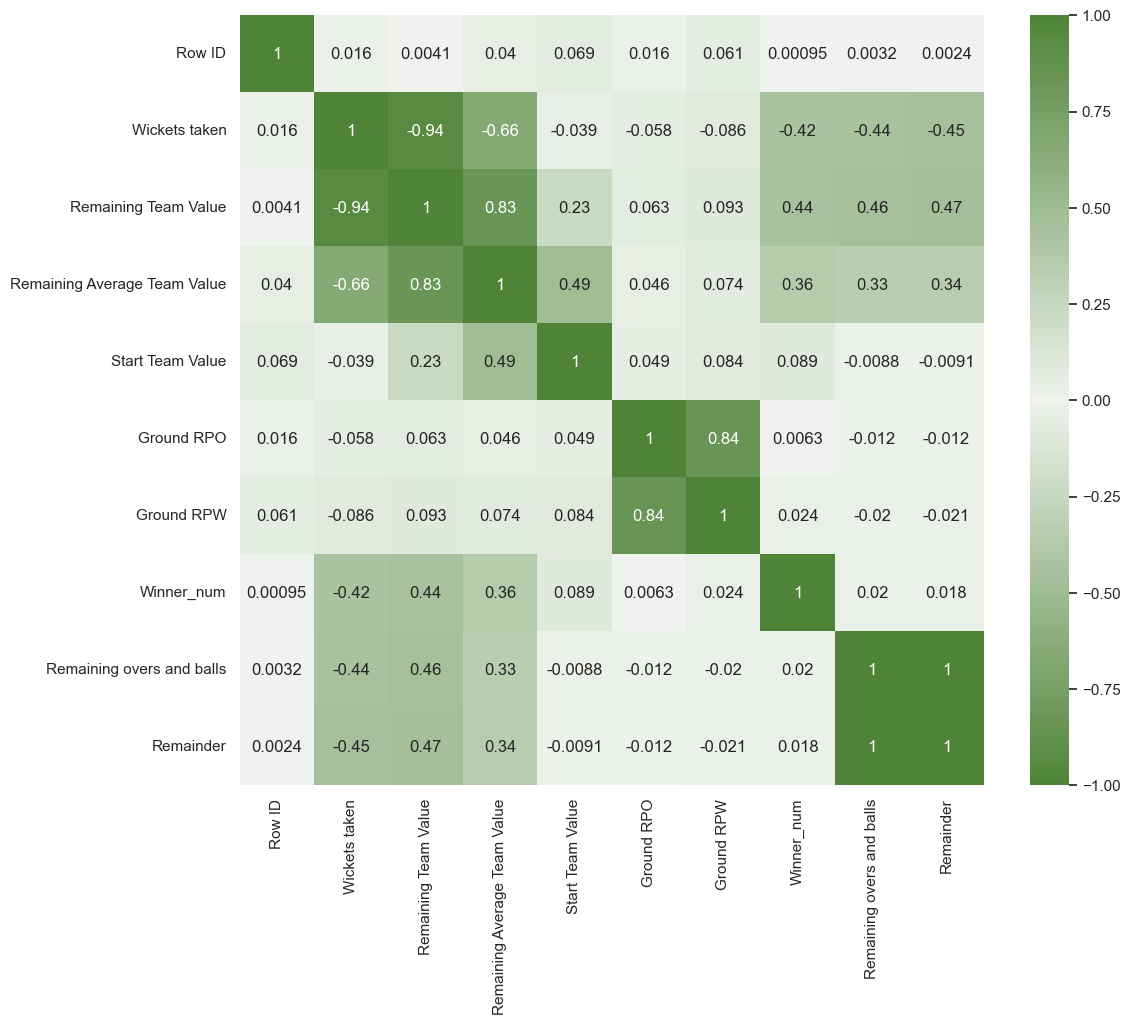

In [63]:
corr(data_train_lognorm_df, 'pearson')['Winner_num']

Row ID                         -0.105388
Wickets taken                  -0.147538
Remaining Team Value            0.172574
Remaining Average Team Value    0.187483
Start Team Value                0.161427
Ground RPO                     -0.057844
Ground RPW                      0.006243
Winner_num                      1.000000
Remaining overs and balls      -0.146908
Remainder                      -0.141065
Name: Winner_num, dtype: float64

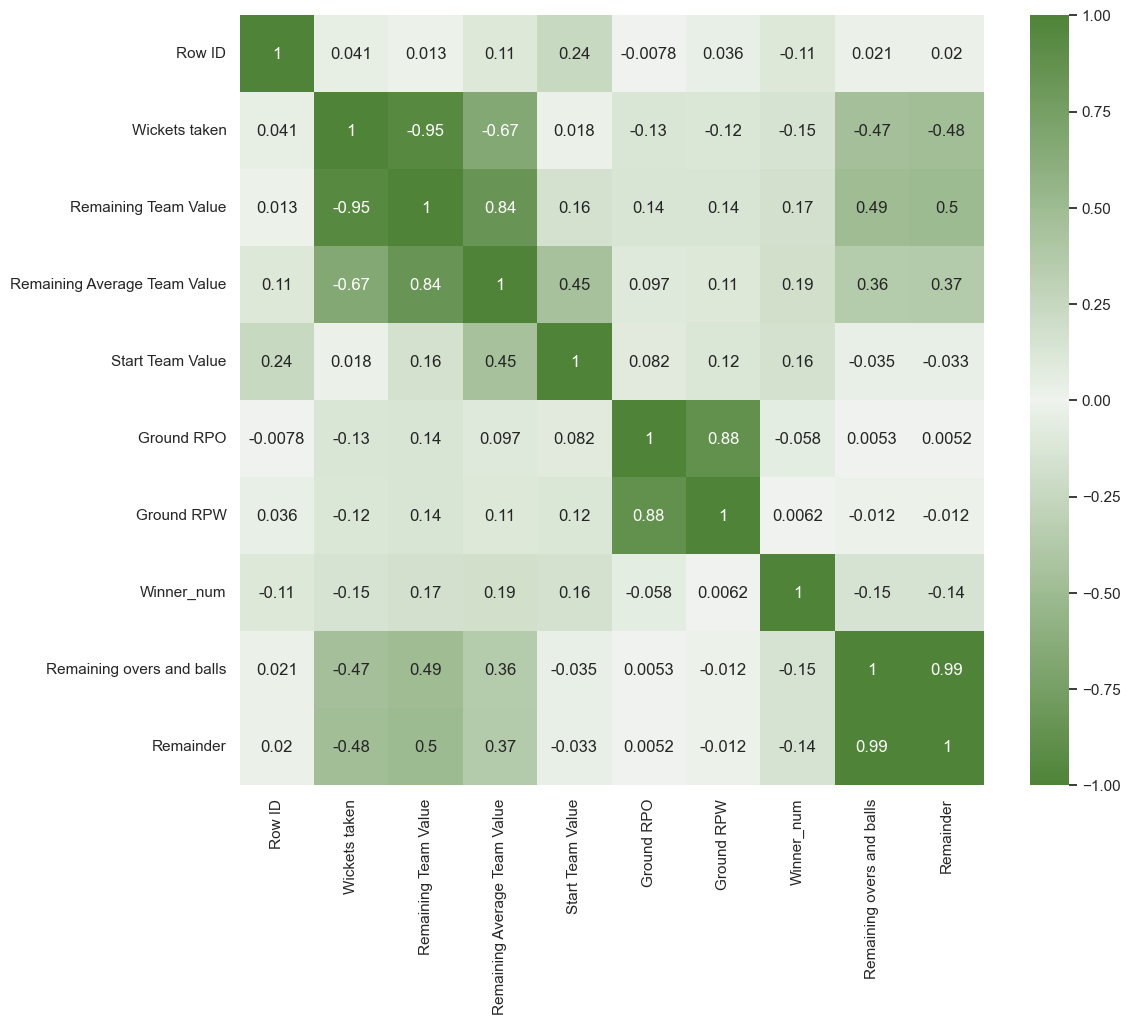

In [64]:
corr(data_train_lognorm_SMOTEmin_df, 'pearson')['Winner_num']

Row ID                         -0.104364
Wickets taken                  -0.145621
Remaining Team Value            0.170819
Remaining Average Team Value    0.186051
Start Team Value                0.159900
Ground RPO                     -0.057384
Ground RPW                      0.006192
Winner_num                      1.000000
Remaining overs and balls      -0.145948
Remainder                      -0.140065
Name: Winner_num, dtype: float64

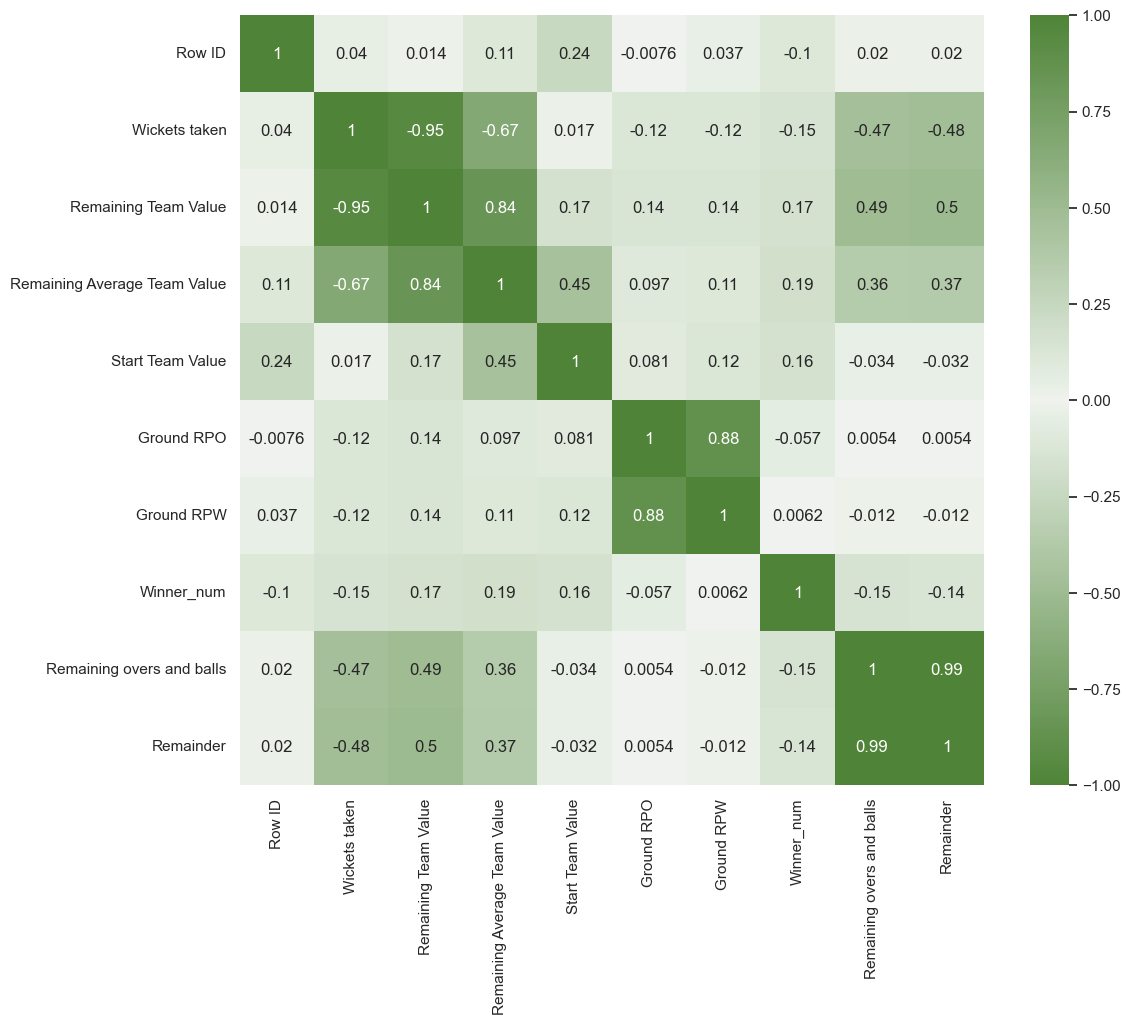

In [65]:
corr(data_train_lognorm_SMOTEauto_df, 'pearson')['Winner_num']

Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [67]:
def scaling(data, scaler):
    scale_data = data.drop(['Winner_num', 'Row ID'], axis =1)

    if scaler == MinMaxScaler:
        min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
        data_scaled = min_max_scaler.fit_transform(scale_data)

    elif scaler == StandardScaler:
        std_scaler = StandardScaler()
        data_scaled = std_scaler.fit_transform(scale_data)

    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.rename(columns={0:'Wickets taken', 1: 'Remaining Team Value', 2: 'Remaining Average Team Value', 3: 'Start Team Value', 4: 'Ground RPO', 5: 'Ground RPW', 6:'Remaining overs and balls', 7:'Remainder'}, inplace=True)
    data_scaled.reset_index(drop=True)
    data_scaled.insert(loc=0, column='Row ID', value=data['Row ID'])
    data_scaled.insert(loc=7, column='Winner_num', value=data['Winner_num'])
    return data_scaled

In [68]:
scaling(data_train_lognorm_df, StandardScaler)

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,-0.41346,0.627209,0.594813,0.001691,-0.423239,-0.252994,1,1.034687,1.080007
1,1,-0.41346,0.627209,0.594813,0.001691,-0.423239,-0.252994,1,1.026318,1.074529
2,3,-0.41346,0.627209,0.594813,0.001691,-0.423239,-0.252994,1,1.009438,1.063521
3,4,-0.41346,0.627209,0.594813,0.001691,-0.423239,-0.252994,1,1.000926,1.057989
4,6,-0.41346,0.627209,0.594813,0.001691,-0.423239,-0.252994,1,0.983757,1.024407
...,...,...,...,...,...,...,...,...,...,...
216173,270216,-0.41346,0.085135,-0.480196,-1.805825,1.299900,0.421973,2,-2.192850,-2.226711
216174,270218,-0.41346,0.085135,-0.480196,-1.805825,1.299900,0.421973,2,-2.343203,-2.308085
216175,270219,-0.41346,0.085135,-0.480196,-1.805825,1.299900,0.421973,2,-2.424427,-2.530794
216176,270220,-0.41346,0.085135,-0.480196,-1.805825,1.299900,0.421973,2,-2.510295,-2.579140


In [69]:
#Non smote
data_train_min_max_scaled = scaling(data_train_lognorm_df, MinMaxScaler)
data_train_standard_scaled = scaling(data_train_lognorm_df, StandardScaler)

#Smote min
data_train_min_max_scaled_SMOTEmin_df = scaling(data_train_lognorm_SMOTEmin_df, MinMaxScaler)
data_train_standard_scaled_SMOTEmin_df = scaling(data_train_lognorm_SMOTEmin_df, StandardScaler)

#Smote auto
data_train_min_max_scaled_SMOTEauto_df = scaling(data_train_lognorm_SMOTEauto_df, MinMaxScaler)
data_train_standard_scaled_SMOTEauto_df = scaling(data_train_lognorm_SMOTEauto_df, StandardScaler)

Row ID                          0.000953
Wickets taken                  -0.423318
Remaining Team Value            0.443631
Remaining Average Team Value    0.356960
Start Team Value                0.089275
Ground RPO                      0.006312
Ground RPW                      0.023813
Winner_num                      1.000000
Remaining overs and balls       0.019606
Remainder                       0.018174
Name: Winner_num, dtype: float64

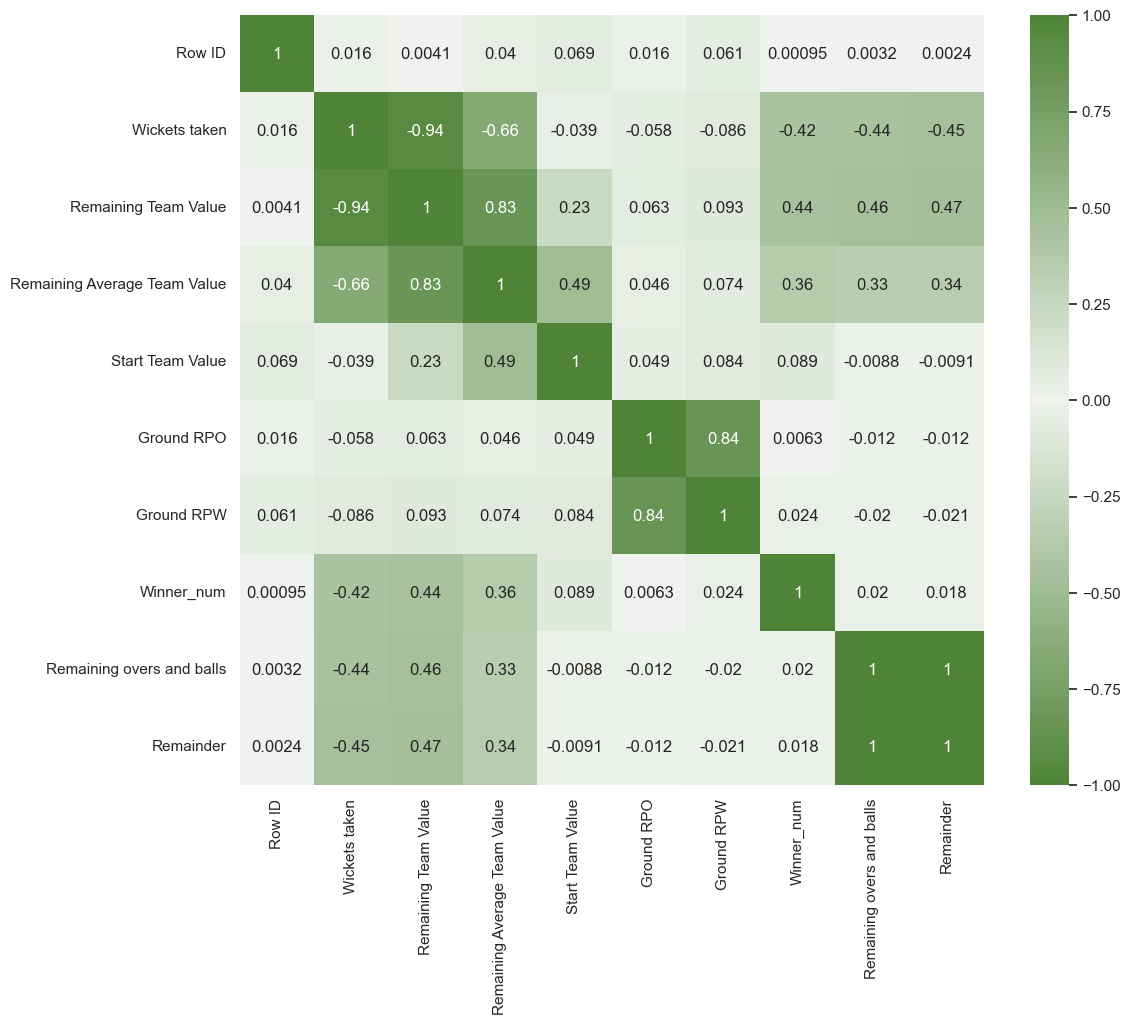

In [70]:
corr(data_train_min_max_scaled, 'pearson')['Winner_num']

Row ID                          0.000953
Wickets taken                  -0.423318
Remaining Team Value            0.443631
Remaining Average Team Value    0.356960
Start Team Value                0.089275
Ground RPO                      0.006312
Ground RPW                      0.023813
Winner_num                      1.000000
Remaining overs and balls       0.019606
Remainder                       0.018174
Name: Winner_num, dtype: float64

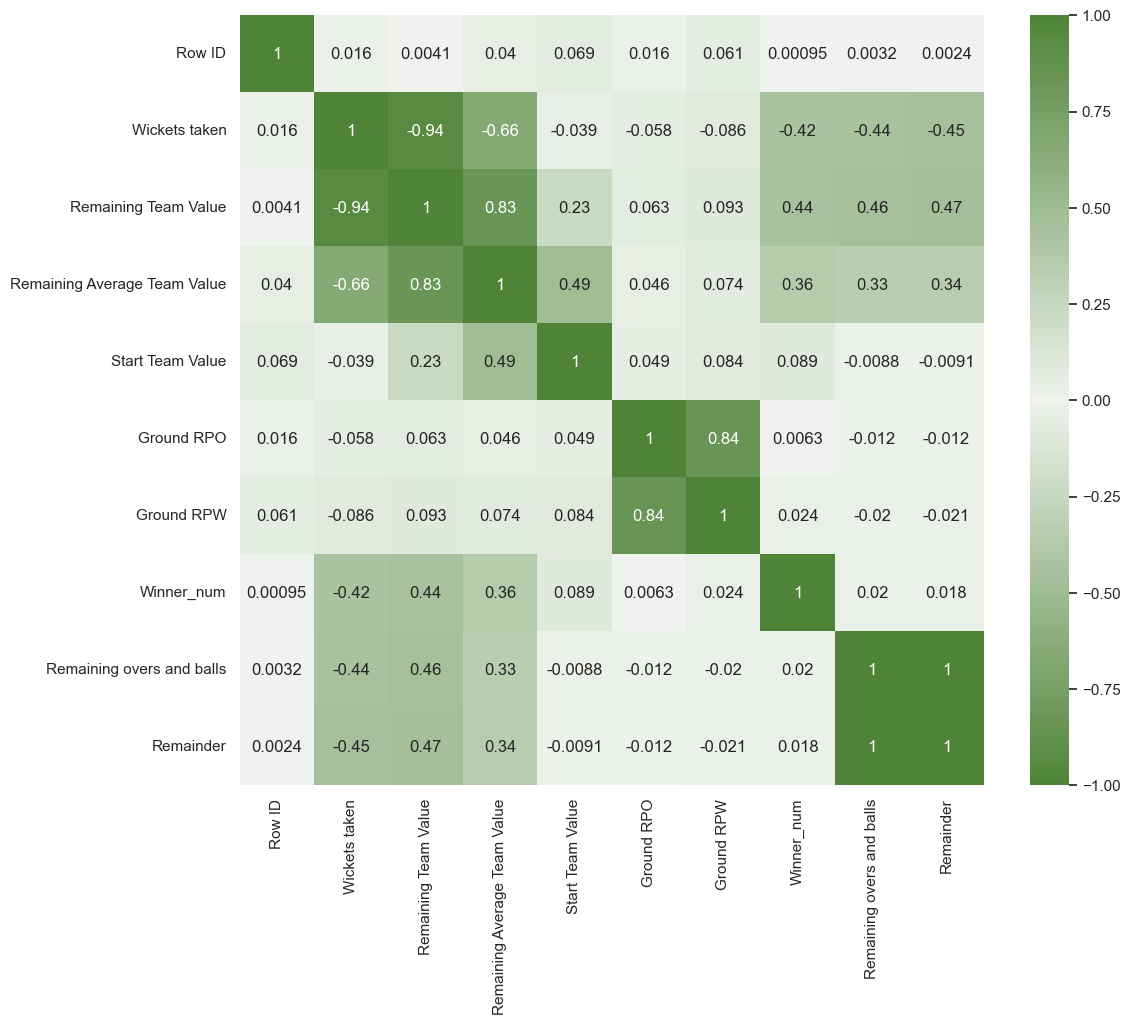

In [71]:
corr(data_train_standard_scaled, 'pearson')['Winner_num']

Clustering for new attributes?


Row ID                         -0.105388
Wickets taken                  -0.147538
Remaining Team Value            0.172574
Remaining Average Team Value    0.187483
Start Team Value                0.161427
Ground RPO                     -0.057844
Ground RPW                      0.006243
Winner_num                      1.000000
Remaining overs and balls      -0.146908
Remainder                      -0.141065
Name: Winner_num, dtype: float64

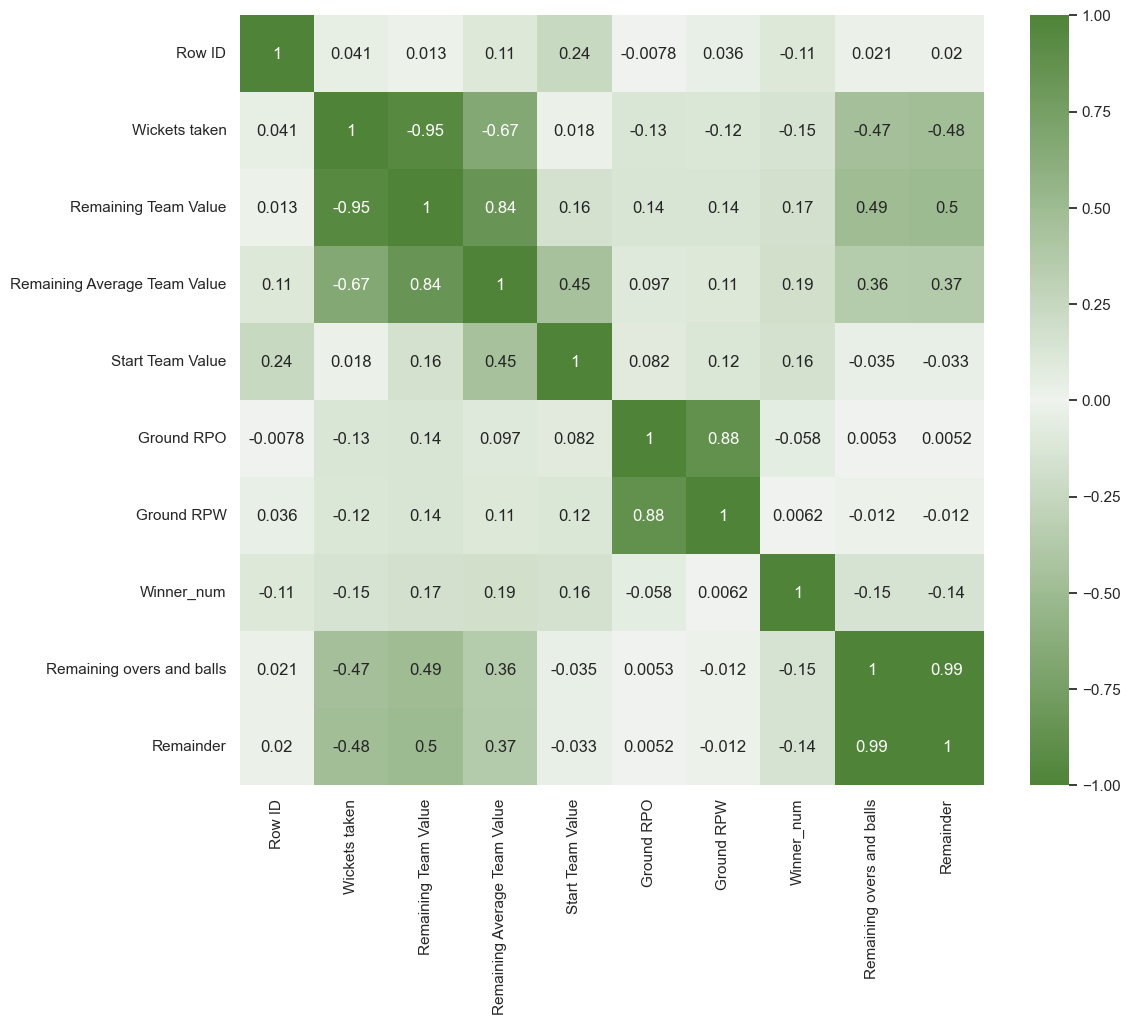

In [72]:
corr(data_train_min_max_scaled_SMOTEmin_df, 'pearson')['Winner_num']

Row ID                         -0.105388
Wickets taken                  -0.147538
Remaining Team Value            0.172574
Remaining Average Team Value    0.187483
Start Team Value                0.161427
Ground RPO                     -0.057844
Ground RPW                      0.006243
Winner_num                      1.000000
Remaining overs and balls      -0.146908
Remainder                      -0.141065
Name: Winner_num, dtype: float64

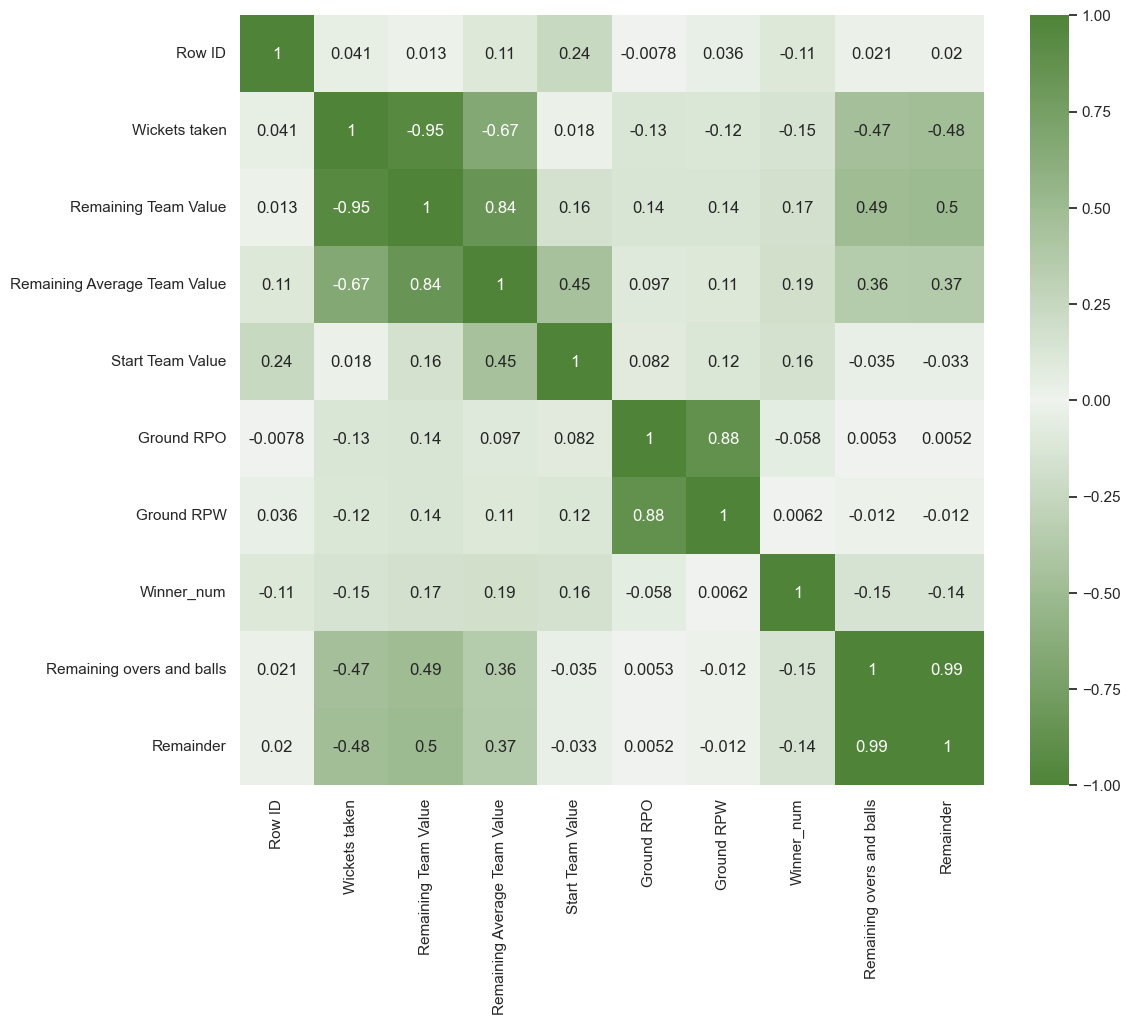

In [73]:
corr(data_train_standard_scaled_SMOTEmin_df, 'pearson')['Winner_num']

Row ID                         -0.104364
Wickets taken                  -0.145621
Remaining Team Value            0.170819
Remaining Average Team Value    0.186051
Start Team Value                0.159900
Ground RPO                     -0.057384
Ground RPW                      0.006192
Winner_num                      1.000000
Remaining overs and balls      -0.145948
Remainder                      -0.140065
Name: Winner_num, dtype: float64

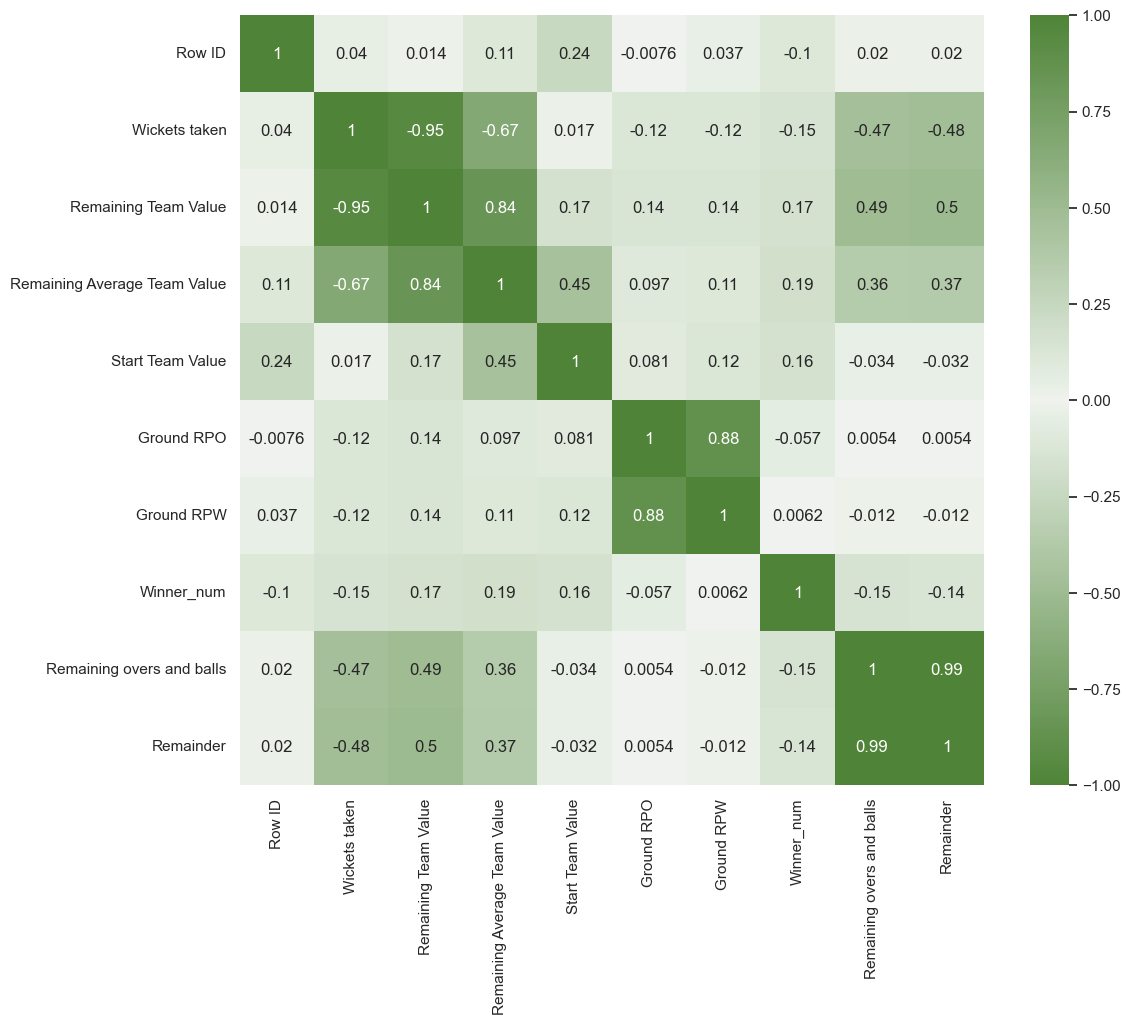

In [74]:
corr(data_train_min_max_scaled_SMOTEauto_df, 'pearson')['Winner_num']

Row ID                         -0.104364
Wickets taken                  -0.145621
Remaining Team Value            0.170819
Remaining Average Team Value    0.186051
Start Team Value                0.159900
Ground RPO                     -0.057384
Ground RPW                      0.006192
Winner_num                      1.000000
Remaining overs and balls      -0.145948
Remainder                      -0.140065
Name: Winner_num, dtype: float64

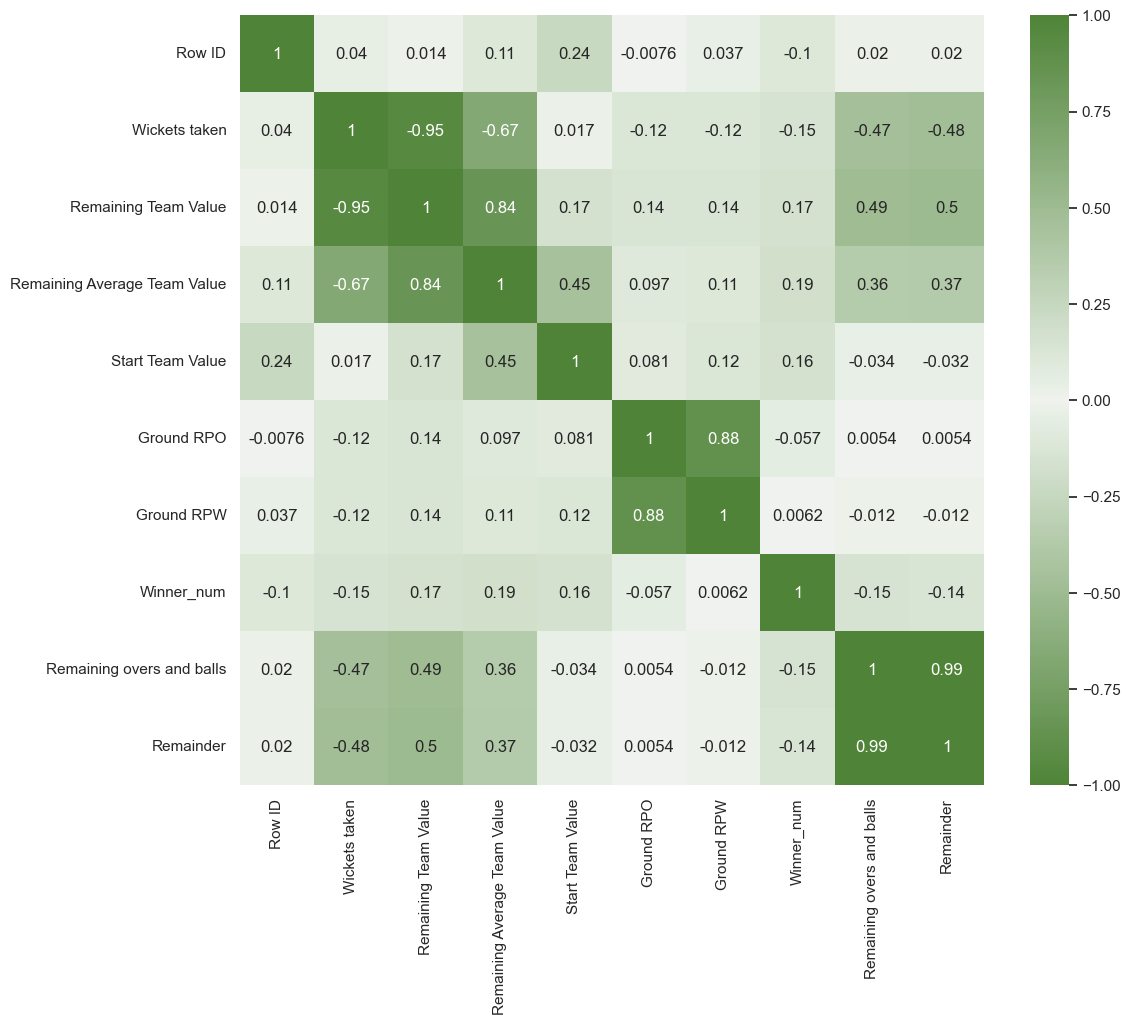

In [75]:
corr(data_train_standard_scaled_SMOTEauto_df, 'pearson')['Winner_num']

In [76]:
#Whichever one I choose
data_train_transformed_df= data_train_standard_scaled_SMOTEauto_df

In [77]:
data_train_transformed_df.to_csv("data_train_transformed_csv")

In [78]:
data_test.to_csv("data_test_csv")

In [79]:
data_train_transformed_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,-0.456910,0.655180,0.607048,-0.098918,-0.346523,-0.232473,1,1.012697,1.075316
1,1,-0.456910,0.655180,0.607048,-0.098918,-0.346523,-0.232473,1,1.005512,1.070467
2,3,-0.456910,0.655180,0.607048,-0.098918,-0.346523,-0.232473,1,0.991020,1.060720
3,4,-0.456910,0.655180,0.607048,-0.098918,-0.346523,-0.232473,1,0.983712,1.055823
4,6,-0.456910,0.655180,0.607048,-0.098918,-0.346523,-0.232473,1,0.968972,1.026092
...,...,...,...,...,...,...,...,...,...,...
329569,10570,-1.103657,1.214153,0.919880,-0.098918,0.412043,0.344080,3,0.811488,0.861623
329570,199325,-0.456910,0.841504,0.958196,0.467671,0.252482,0.598053,3,0.267423,0.249775
329571,122245,0.801180,-0.649088,0.013576,-0.098918,0.252482,0.341475,3,-1.698283,-1.804136
329572,85363,0.454629,-0.462764,-0.406114,-1.303464,-2.103724,-2.208669,3,-0.187144,-0.253504


Smote: Norm minmax, norm standard
Not smote: Norm minmax, norm standard

Experiment with Attribute combinations

Commentary

Shall I plot the Winner before I categorise?
Very imbalanced - 1 and 2 mainly fine but 0 not.

Be careful that any data added is to the end, given the row index is a unique iD.

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network

Questions:
Should I change the 0s to 3s or similar for Winner_num so that I don't have to add things to them to do the lognorm etc.